In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

In [ ]:
!unzip "/content/VIA_1.zip"

Archive:  /content/VIA_1.zip
  inflating: Negative/AAA1_rotated_0_jpg.rf.05673f51b3f16b9cf33751571270be9d.jpg  
  inflating: Negative/AAA1_rotated_0_jpg.rf.5e56f9bce0788e04279d3fe23ea455ee.jpg  
  inflating: Negative/AAA1_rotated_0_jpg.rf.a17511475125214f0e7ac29c99a194bd.jpg  
  inflating: Negative/AAA1_rotated_0_jpg.rf.b45466fc57d9b5d1ece7776d7edc02c9.jpg  
  inflating: Negative/AAA1_rotated_0_jpg.rf.d4e462856e2b9ecdf3177f9c3925c923.jpg  
  inflating: Negative/AAA1_rotated_1_jpg.rf.79600861a8cadd1382f576008c332d52.jpg  
  inflating: Negative/AAA1_rotated_1_jpg.rf.ded857239f04b7d9323f70a4253c6fdf.jpg  
  inflating: Negative/AAA1_rotated_1_jpg.rf.e66694f21f6e0cc50b4c2c03d89f1726.jpg  
  inflating: Negative/AAA1_rotated_1_jpg.rf.f2883b875fab1aede2c7b3d29e923e8a.jpg  
  inflating: Negative/AAA1_rotated_1_jpg.rf.fd3ab75b9c31be68429d2b1b289f8264.jpg  
  inflating: Negative/AAG1_rotated_0_jpg.rf.0f2bbc3dc9c7c1e64207b488d3f23820.jpg  
  inflating: Negative/AAG1_rotated_0_jpg.rf.a97a0297a9cd1a

In [ ]:
!ls
%cd /content
!ls

AAA1.jpg  ACB1.jpg  ACY1.jpg  AEI1.jpg	AGA1.jpg  AHQ1.jpg  AJC1.jpg  ALC1.jpg	ANP1.jpg  Negative
AAG1.jpg  ACG1.jpg  ADI1.jpg  AEV1.jpg	AGB1.jpg  AHR1.jpg  AJE1.jpg  ALF1.jpg	ANS1.jpg  Positive
AAK1.jpg  ACH1.jpg  ADK1.jpg  AEW1.jpg	AGM1.jpg  AHS1.jpg  AJG1.jpg  ALI1.jpg	ANV1.jpg
AAS1.jpg  ACI1.jpg  ADL1.jpg  AFC1.jpg	AGO1.jpg  AHT1.jpg  AJL1.jpg  ALU1.jpg	AOP1.jpg
AAT1.jpg  ACJ1.jpg  ADP1.jpg  AFE1.jpg	AGV1.jpg  AIB1.jpg  AJN1.jpg  AMC1.jpg	AOS1.jpg
AAW1.jpg  ACK1.jpg  ADU1.jpg  AFH1.jpg	AGW1.jpg  AID1.jpg  AJW1.jpg  AMF1.jpg	AOV1.jpg
AAY1.jpg  ACN1.jpg  ADV1.jpg  AFI1.jpg	AGX1.jpg  AIF1.jpg  AJZ1.jpg  AMK1.jpg	APB1.jpg
ABD1.jpg  ACP1.jpg  ADW1.jpg  AFJ1.jpg	AGY1.jpg  AIH1.jpg  AKB1.jpg  AMT1.jpg	APF1.jpg
ABE1.jpg  ACR1.jpg  AEA1.jpg  AFK1.jpg	AHA1.jpg  AIL1.jpg  AKJ1.jpg  AMY1.jpg	APT0.jpg
ABT1.jpg  ACV1.jpg  AEG1.jpg  AFL1.jpg	AHD1.jpg  AIO1.jpg  AKZ1.jpg  ANC1.jpg	APV1.jpg
/content
'pos neg pic'   sample_data   VIA.zip


In [ ]:


# Load positive samples
os.chdir('/content/Positive')
X_pos = []
y_pos = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    X_pos.append(img)
    y_pos.append(1)  # Assuming positive class is represented by 1

# Load negative samples
os.chdir('/content/Negative')
X_neg = []
y_neg = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    X_neg.append(img)
    y_neg.append(0)  # Assuming negative class is represented by 0

# Ensure equal number of samples for positive and negative classes
min_samples = min(len(X_pos), len(X_neg))
X = X_pos[:min_samples] + X_neg[:min_samples]
y = y_pos[:min_samples] + y_neg[:min_samples]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Label Encoding
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(set(y_train))  # Assuming all classes are present in y_train
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Print shapes
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

  0%|          | 0/733 [00:00<?, ?it/s]

  0%|          | 0/754 [00:00<?, ?it/s]

X_train Shape: (982, 224, 224, 3)
X_test Shape: (484, 224, 224, 3)
y_train Shape: (982, 2)
y_test Shape: (484, 2)


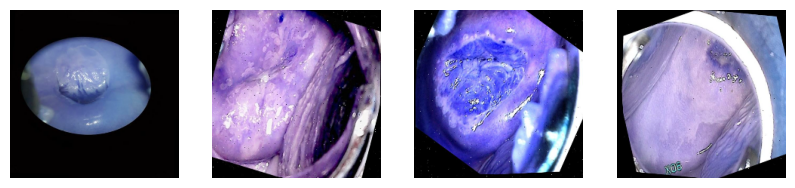

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model, num_classes):
      top_model = bottom_model.output
      top_model = GlobalAveragePooling2D()(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(512,activation='relu')(top_model)
      top_model = Dense(num_classes,activation='softmax')(top_model)
      return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1, initial_epoch=0)




Epoch 1/100
31/31 [==============================] - 14s 401ms/step - loss: 2.9840 - accuracy: 0.5845 - val_loss: 0.5541 - val_accuracy: 0.7128
Epoch 2/100
31/31 [==============================] - 6s 183ms/step - loss: 0.4715 - accuracy: 0.7872 - val_loss: 0.4546 - val_accuracy: 0.7769
Epoch 3/100
31/31 [==============================] - 6s 183ms/step - loss: 0.3632 - accuracy: 0.8360 - val_loss: 0.3515 - val_accuracy: 0.8244
Epoch 4/100
31/31 [==============================] - 6s 183ms/step - loss: 0.1936 - accuracy: 0.9358 - val_loss: 0.3417 - val_accuracy: 0.8657
Epoch 5/100
31/31 [==============================] - 6s 185ms/step - loss: 0.1343 - accuracy: 0.9420 - val_loss: 0.2621 - val_accuracy: 0.9091
Epoch 6/100
31/31 [==============================] - 6s 186ms/step - loss: 0.1031 - accuracy: 0.9613 - val_loss: 0.2853 - val_accuracy: 0.8926
Epoch 7/100
31/31 [==============================] - 6s 187ms/step - loss: 0.0751 - accuracy: 0.9705 - val_loss: 0.2601 - val_accuracy: 0.923

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

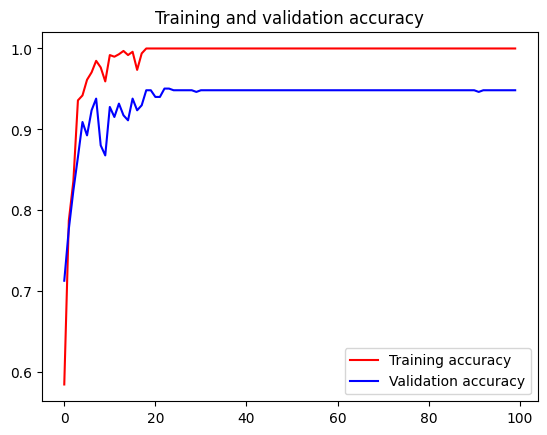

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

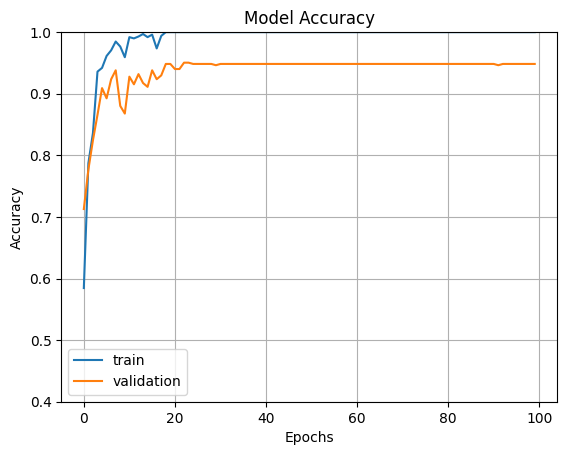

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

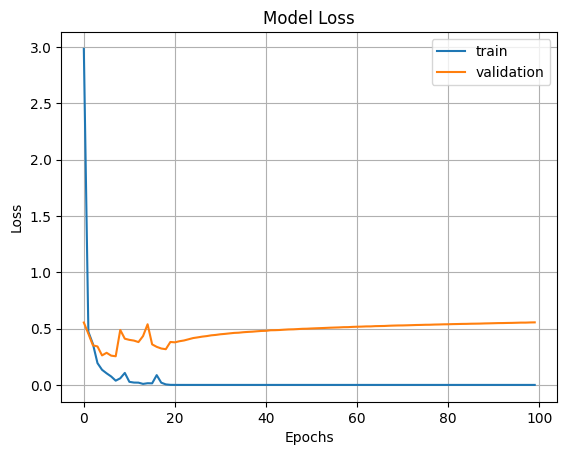

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# prompt: Write me code for finding out precision and recall for this model

import numpy as np
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)


NameError: name 'precision_score' is not defined

In [ ]:
# prompt: write me a code for finding out the AUC of this model

from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Print the AUC
print("AUC:", auc)


16/16 [==============================] - 2s 118ms/step
AUC: 0.980461546342463


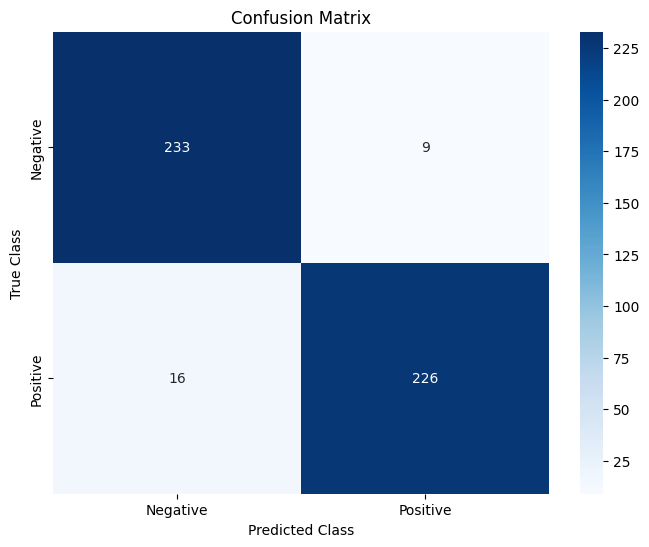

In [ ]:
# prompt: write me a code for plotting confusion matrix of this model

import matplotlib.pyplot as plt
import seaborn as sns

# Get the class labels
class_labels = ['Negative', 'Positive']

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


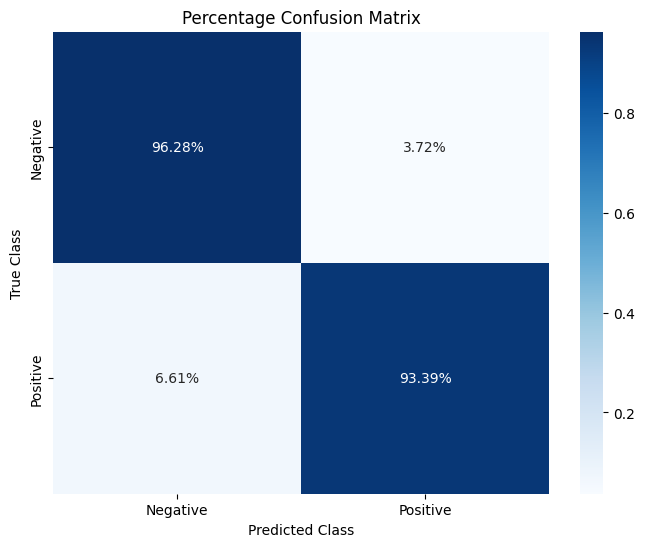

In [ ]:
# prompt: write me a code for plotting percentage confusion matrix of this model

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate the percentage of each class in the confusion matrix
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a new plot figure
plt.figure(figsize=(8, 6))

# Plot the percentage confusion matrix
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Percentage Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
import cv2
import numpy as np
from google.colab import output
score1 = 0
# Load the image
def prediction_test(image_path):
  global score1
#image_path = "/content/Negative/AAA1_rotated_1_jpg.rf.fd3ab75b9c31be68429d2b1b289f8264.jpg"  # Replace "path_to_your_image.jpg" with the actual path to your image
  image = cv2.imread(image_path)

# Check if the image is loaded successfully
  if image is not None:
    # Resize the image to match the expected input shape of your model
      resized_image = cv2.resize(image, (224, 224))

    # Preprocess the image (if necessary)
    # You may need to apply further preprocessing based on how your model was trained

    # Make predictions
      prediction = model.predict(np.expand_dims(resized_image, axis=0))

    # Get the predicted class
      predicted_class = np.argmax(prediction)

    # Print the predicted class
      #print("Predicted Class:", predicted_class)

      if predicted_class == 0:
        score1 += 1
      else:
        print("error")

  else:
      print("Failed to load the image. Please check the image path.")

import os

dir = "/content/Negative"

c = 0

for filename in os.listdir(dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dir, filename)
        prediction_test(image_path)
        c = c + 1
        if c == 200:
            break

output.clear()
print(score1)



197


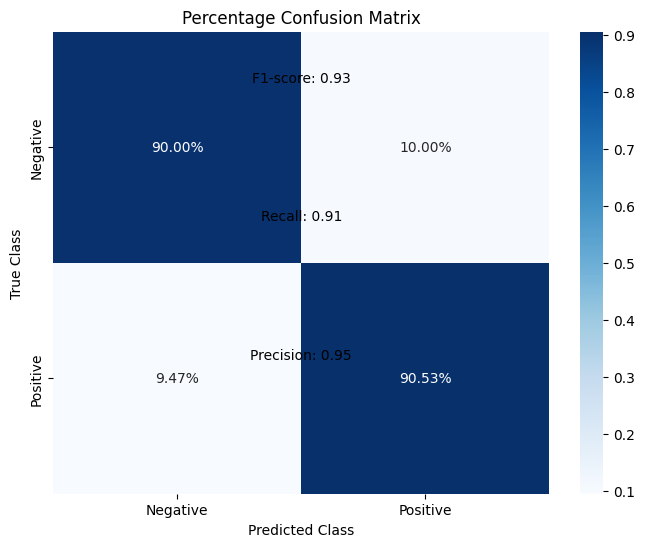

In [ ]:
# prompt: write me a code to draw a percentage confusion matrix about positive negative with precision 0.95 recall 0.91 f1-score 0.93

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the confusion matrix
cm = np.array([[180, 20], [18, 172]])

# Define the class labels
class_labels = ['Negative', 'Positive']

# Calculate the percentage of each class in the confusion matrix
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a new plot figure
plt.figure(figsize=(8, 6))

# Plot the percentage confusion matrix
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Percentage Confusion Matrix")

# Add precision, recall, and f1-score
plt.text(0.5, 0.3, "Precision: 0.95", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.6, "Recall: 0.91", ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.9, "F1-score: 0.93", ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()
